# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

In [ ]:
!python -m venv sklearn-env
!sklearn-env\Scripts\activate  # activate
!pip install -U scikit-learn

In [1]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)
folium.Map()
m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# import ...  # your favorite data package
# import ...  # your favorite visualization package

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [3]:
df = pd.read_csv("train.csv")
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [4]:
df = df.drop(columns=["dropoff_datetime"])
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format="%Y-%m-%d %X")
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  
0                  N            455  
1                  N            663  
2                  N           2124  
3                  N            429  
4                  N            435

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

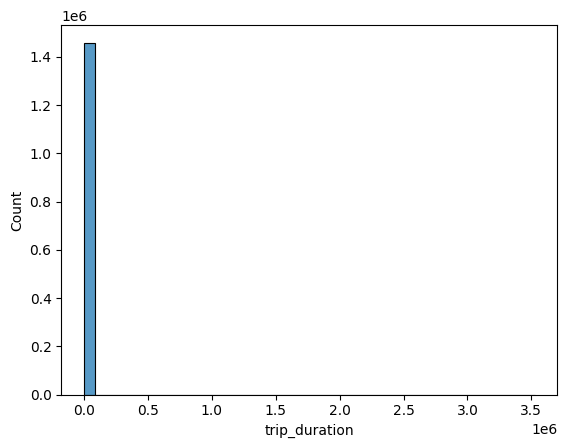

In [5]:
sns.histplot(df["trip_duration"], bins=40)
plt.show()
plt.close()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ:** абсолютное большинство поездок сконцентрировано в начале диапозона значений, однако есть очевидные выбросы. Их мало, поэтому соответствующие им столбцы даже не видны, но значения порядка $3*10^6$ секунд (~месяц) на оси X говорят об их наличии - поездки на такси вряд ли должны занимать больше нескольких часов.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ**: Когда мы хотим предсказать время автомобильной поездки, мы не хотим требовать точности до минуты - это бессмысленно, так как флуктуация, вызванная пробками, авариями, инетрвалами светофоров и т.д. всегда велика. Когда мы планируем автомобильную поездку, в том числе на такси, нас интересует только порядок времени поездки. Так, нам принципиально знать, займёт поездка *примерно* 10 минут или *примерно* 40. Ошибка в несколько минут нам не важна (даже если эта ошибка велика в относительном выражении - например, поездка займёт 2 минуты, а не 4). Логарифм позволяет сфокусироваться на порядке величины, а не на абсолютном значении.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: 
$$
\begin{gathered}
\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} \rightarrow min \iff \\ \iff
\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big( \hat{y}_i - \hat{a}(x_i) \big)^2} \rightarrow min \iff \\ \iff
\frac{1}{\ell}\sum_{i=1}^{\ell} \big( \hat{y}_i - \hat{a}(x_i) \big)^2 \rightarrow min \iff \text{MSE}(\hat{a})
\end{gathered}
$$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [6]:
df["log_trip_duration"] = np.log1p(df["trip_duration"])
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  log_trip_duration  
0                  N            455           6.122493  
1                  N            663           6.498282  
2                  N           2124           7.661527  
3                  N            429           6.063785  
4                  N            435           6.077642

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [7]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt((np.square(log1p_y_true - log1p_y_pred)).mean())


best_const = df["log_trip_duration"].mean()
rmsle_best_const = rmsle(df["log_trip_duration"], best_const)
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

<Axes: xlabel='pickup_datetime'>

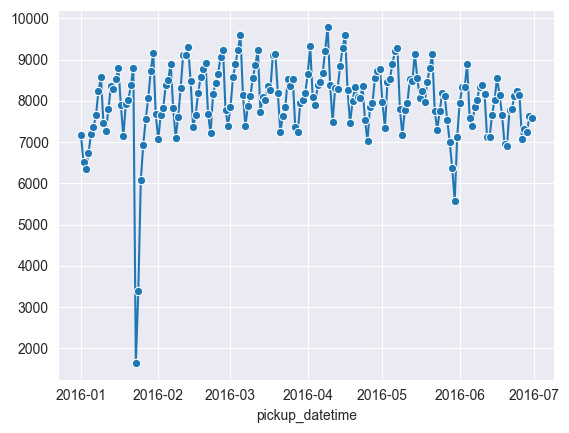

In [8]:
sns.set_style("darkgrid")
trips_by_date = df.groupby(df["pickup_datetime"].dt.date).size()
sns.lineplot(data=trips_by_date, marker="o")

In [9]:
trips_by_date.sort_values().head(20)

pickup_datetime
2016-01-23    1648
2016-01-24    3383
2016-05-30    5570
2016-01-25    6084
2016-01-03    6353
2016-05-29    6372
2016-01-02    6512
2016-01-04    6725
2016-06-20    6910
2016-01-26    6941
2016-06-19    6962
2016-05-28    7004
2016-04-25    7028
2016-02-01    7064
2016-06-26    7084
2016-02-08    7110
2016-06-12    7112
2016-06-13    7114
2016-05-31    7131
2016-01-18    7146
dtype: int64

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

**Ответ**: Первый период - в районе 23 января 2016 года, когда на северо-востоке США имела место одна из сильнейших в истории региона снежных бурь, парализовавшая в том числе Нью-Йорк. Второй период - 30 мая 2016 года. В этот день праздновался Memorial day, один из важнейших американских национальных праздников. В это время многие улицы перекрываются и становятся пешеходными, кроме того, это выходной.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

Text(0.5, 0, 'Время')

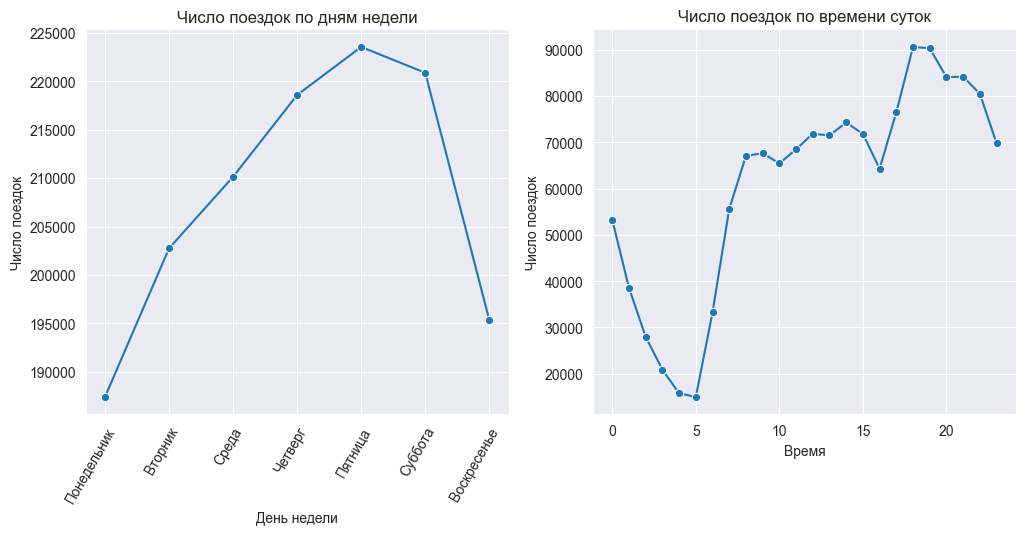

In [10]:
trips_by_dow = df.groupby(by=df["pickup_datetime"].dt.weekday).size()
trips_by_hour = df.groupby(by=df["pickup_datetime"].dt.hour).size()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=trips_by_dow, ax=axes[0], marker="o")
sns.lineplot(data=trips_by_hour, ax=axes[1], marker="o")


axes[0].set_title("Число поездок по дням недели")
axes[0].set_xlabel("День недели")
axes[0].set_ylabel("Число поездок")
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"],
                        rotation=60, 
                        ha="right",
                        rotation_mode="anchor")

axes[1].set_title("Число поездок по времени суток")
axes[1].set_ylabel("Число поездок")
axes[1].set_xlabel("Время")

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

Text(0.5, 0, 'Время суток')

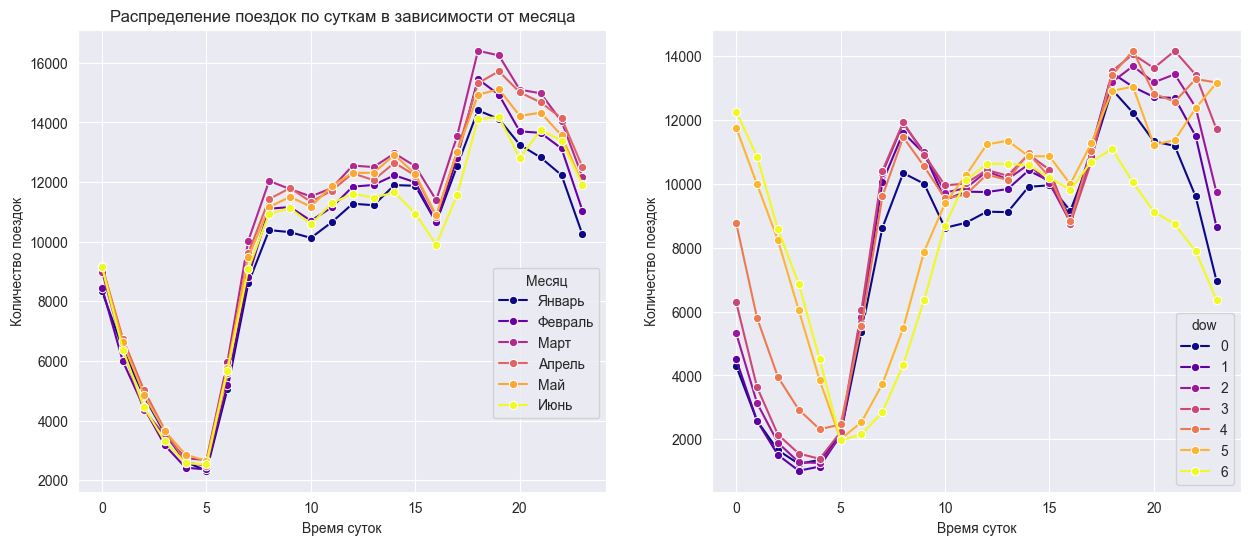

In [11]:
month_hour = df.groupby([df["pickup_datetime"].dt.month, df["pickup_datetime"].dt.hour]).count()[["id"]]
month_hour = month_hour.rename_axis(["month", "hour"]).reset_index()
month_hour.columns = ["month", "hour", "count"]

dow_hour = df.groupby([df["pickup_datetime"].dt.weekday, df["pickup_datetime"].dt.hour]).count()[["id"]]
dow_hour = dow_hour.rename_axis(["dow", "hour"]).reset_index()
dow_hour.columns = ["dow", "hour", "count"]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.lineplot(ax=axes[0], data=month_hour, x="hour", y="count", hue="month", palette="plasma", marker="o")

axes[0].set_xlabel("Время суток")
axes[0].set_ylabel("Количество поездок")
axes[0].set_title("Распределение поездок по суткам в зависимости от месяца")

hands, labs = axes[0].get_legend_handles_labels()

axes[0].legend(title="Месяц",
               bbox_to_anchor=(1, 0.5),
               labels=["Январь", "Февраль", "Март", "Апрель", "Май", "Июнь"],
               handles=hands)

sns.lineplot(ax=axes[1], data=dow_hour, x="hour", y="count", hue="dow", palette="plasma", marker="o")
axes[1].set_ylabel("Количество поездок")
axes[1].set_xlabel("Время суток")

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Ожидаемо выделяется ночное время суток (мало поездок) и период с 17 до 20-22 часов, когда все едут с работы и заметен скачок в колчестве поездок. В рамках недели в субботу, воскресенье (и немного в пятницу) по сравнению с остальными днями видно увеличение количества ночных поездок (ночная жизнь), а в воскресенье ещё и отсутствует обычный для остальных дней час-пик после 17:00, ведь никто не едет с работы. 
Из месяцев выбиваются, наверное, только июнь и январь. В июне, очевидно, люди меньше заказывают такси вечером, чтобы вернуться домой, так как многие уже в отпуске. В январе пониженный спрос на такси на протяжении почти всего дня и вечера, возможно, связан с пробакми на дорогах из-за погодных условий.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train, test = train_test_split(df, train_size=0.7, test_size=0.3)

Text(0.5, 0, 'День года по счёту')

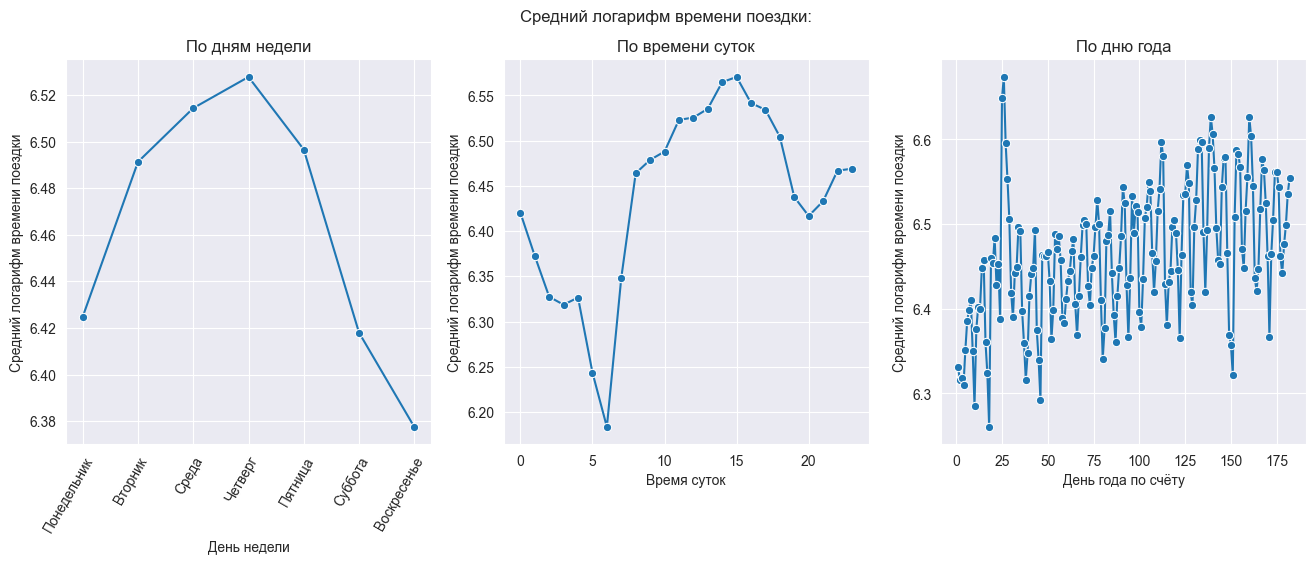

In [14]:
train_by_dow = train.groupby(train["pickup_datetime"].dt.weekday).mean("log_trip_duration")[["log_trip_duration"]].reset_index()
train_by_dow.columns = ["dow", "mean_log_trip"]

train_by_hour = train.groupby(train["pickup_datetime"].dt.hour).mean("log_trip_duration")[["log_trip_duration"]].reset_index()
train_by_hour.columns = ["hour", "mean_log_trip"]

train_by_day = train.groupby(train["pickup_datetime"].dt.dayofyear).mean("log_trip_duration")[["log_trip_duration"]].reset_index()
train_by_day.columns = ["day", "mean_log_trip"]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

fig.suptitle("Средний логарифм времени поездки:")

sns.lineplot(data=train_by_dow, x="dow", y="mean_log_trip", marker="o", ax=axes[0])
axes[0].set_title("По дням недели")
axes[0].set_ylabel("Средний логарифм времени поездки")
axes[0].set_xlabel("День недели")
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"],
                        rotation=60, 
                        ha="right",
                        rotation_mode="anchor")

sns.lineplot(data=train_by_hour, x="hour", y="mean_log_trip", marker="o", ax=axes[1])
axes[1].set_title("По времени суток")
axes[1].set_ylabel("Средний логарифм времени поездки")
axes[1].set_xlabel("Время суток")

sns.lineplot(data=train_by_day, x="day", y="mean_log_trip", marker="o", ax=axes[2])
axes[2].set_title("По дню года")
axes[2].set_ylabel("Средний логарифм времени поездки")
axes[2].set_xlabel("День года по счёту")

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ:** общая форма графиков времени ожидания и количества поездок действительно совпадает. Это можно объяснить тем, в периоды, когда люди совершают больше всего поездок на такси, дороги в целом более загружены, ведь помимо такси на дорогах становится больше обычных автомобилей (домой с работы едут все, не только пассажиры такси).

В первый аномальный период (конец января) среднее время поездки взлетело - это следствие сильной стихии, огромного количества выпавших осадков. Во второй аномальный период (конец мая) длительность поездок наоборот сильно упала. Вероятно, если кто-то и совершал поездки на такси в Memorial Day, то это были не поездки на работу в центр из пригорода, а которкие поездки в рамках одного района. Кроме того, совершить поездку через весь город в этот день было технически невозможно, поэтому никто и не пытался.

Из третьего графика мы можем видеть, что с течением года люди начинают в среднем совершать всё больше поездок.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [16]:
train["dow"] = train["pickup_datetime"].dt.weekday
train["month"] = train["pickup_datetime"].dt.month
train["hour"] = train["pickup_datetime"].dt.hour
train["anomal_blizz"] = train["pickup_datetime"].dt.dayofyear.isin([24, 25, 26, 27]).astype(int)
train["anomal_mem"] = train["pickup_datetime"].dt.dayofyear.isin([149, 150]).astype(int)
train["day_number"] = train["pickup_datetime"].dt.dayofyear

test["dow"] = test["pickup_datetime"].dt.weekday
test["month"] = test["pickup_datetime"].dt.month
test["hour"] = test["pickup_datetime"].dt.hour
test["anomal_blizz"] = test["pickup_datetime"].dt.dayofyear.isin([24, 25, 26, 27]).astype(int)
test["anomal_mem"] = test["pickup_datetime"].dt.dayofyear.isin([149, 150]).astype(int)
test["day_number"] = test["pickup_datetime"].dt.dayofyear

train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1247960  id2374035          1 2016-01-30 13:50:34                1   
100182   id0812705          2 2016-01-22 07:23:51                1   
313351   id0128814          1 2016-03-03 00:24:48                1   
1295537  id1188135          1 2016-03-06 19:41:14                1   
393902   id1097874          2 2016-01-01 20:22:33                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1247960        -74.001633        40.737621         -73.993294   
100182         -73.989967        40.756969         -73.979553   
313351         -73.978699        40.745083         -73.904404   
1295537        -73.989822        40.734142         -73.939659   
393902         -74.015541        40.716038         -74.005951   

         dropoff_latitude store_and_fwd_flag  trip_duration  \
1247960         40.742355                  N            298   
100182          40.756580                  N            191   
313351          40.747616                  N            966   
1295537         40.700581                  N           1752   
393902          40.723640                  N            429   

         log_trip_duration  dow  month  hour  anomal_blizz  anomal_mem  \
1247960           5.700444    5      1    13             0           0   
100182            5.257495    4      1     7             0           0   
313351            6.874198    3      3     0             0           0   
1295537           7.469084    6      3    19             0           0   
393902            6.063785    4      1    20             0           0   

         day_number  
1247960          30  
100182           22  
313351           63  
1295537          66  
393902            1

<Axes: xlabel='passenger_count', ylabel='log_trip_duration'>

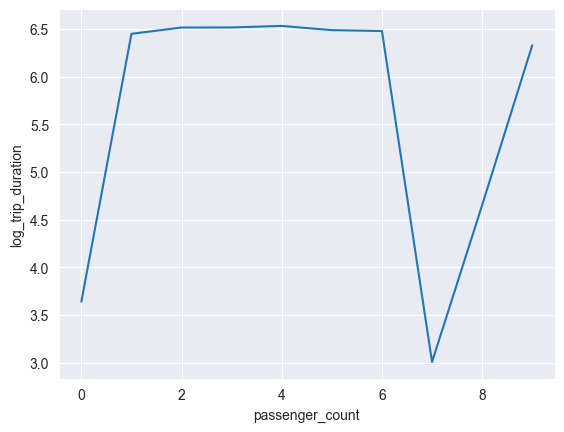

In [17]:
sns.lineplot(data=df.groupby("passenger_count").mean("log_trip_duration")["log_trip_duration"])

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ**: \
**Численные признаки**: день года - визуально есть очевидный линейный тренд, считать каждый день отдельной категорией в таких условиях было бы громоздким и излишним решением (к тому же частично дублировал бы информацию о днях недели)

**Категориельные**: день недели, месяц и время суток по одним и тем же причинам - уникальных значений не так много, при этом зависимость от каждого из этих признаков не монотонна (и тем более не линейна); принадлежность к аномальному периоду - булевы переменные

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

X_train = train.drop(columns=["log_trip_duration", "trip_duration", "id", "pickup_datetime"])
Y_train = train[["log_trip_duration"]]
X_test = test.drop(columns=["log_trip_duration", "trip_duration", "id", "pickup_datetime"])
Y_test = test[["log_trip_duration"]]

categorical = ["dow", "month", "hour", "anomal_blizz", "anomal_mem"]
numeric = ["day_number"]

column_tranformer = ColumnTransformer(transformers=[
    ("scaling", StandardScaler(), numeric),
    ("ohe", OneHotEncoder(handle_unknown="ignore"), categorical),
])

pipeline = Pipeline(steps=[
    ("preprocess", column_tranformer),
    ("regression", Ridge())
])

model = pipeline.fit(X_train, Y_train)
test_prediction = model.predict(X_test)
print(rmsle(Y_test, test_prediction))

log_trip_duration    0.789339
dtype: float64


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [20]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [21]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def random_lat_lon(df):
    sample = df.sample(2000)
    return sample["pickup_latitude"], sample["pickup_longitude"]

your_lat_values, your_lon_values = random_lat_lon(df)

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ**: 1) район Манхэттен - деловой район, из которого, очевидно, совершают много поездок (возможно, многие из них - внутри района); 2) Аэропорт JFK; 3) Аэропорт Ла-Гвардия. Аэропоррты находятся на отдалении от центра, при этом оттуда совершается очень много заказов такси. Эти поездки, скорее всего, сильно отличаются от остальных средний временем и расстоянием (в большую сторону)

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [22]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

train["haversine"] = haversine_array(train["pickup_latitude"], train["pickup_longitude"], train["dropoff_latitude"], train["dropoff_longitude"])
test["haversine"] = haversine_array(test["pickup_latitude"], test["pickup_longitude"], test["dropoff_latitude"], test["dropoff_longitude"])

train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1247960  id2374035          1 2016-01-30 13:50:34                1   
100182   id0812705          2 2016-01-22 07:23:51                1   
313351   id0128814          1 2016-03-03 00:24:48                1   
1295537  id1188135          1 2016-03-06 19:41:14                1   
393902   id1097874          2 2016-01-01 20:22:33                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1247960        -74.001633        40.737621         -73.993294   
100182         -73.989967        40.756969         -73.979553   
313351         -73.978699        40.745083         -73.904404   
1295537        -73.989822        40.734142         -73.939659   
393902         -74.015541        40.716038         -74.005951   

         dropoff_latitude store_and_fwd_flag  trip_duration  \
1247960         40.742355                  N            298   
100182          40.756580                  N            191   
313351          40.747616                  N            966   
1295537         40.700581                  N           1752   
393902          40.723640                  N            429   

         log_trip_duration  dow  month  hour  anomal_blizz  anomal_mem  \
1247960           5.700444    5      1    13             0           0   
100182            5.257495    4      1     7             0           0   
313351            6.874198    3      3     0             0           0   
1295537           7.469084    6      3    19             0           0   
393902            6.063785    4      1    20             0           0   

         day_number  haversine  
1247960          30   0.877885  
100182           22   0.878236  
313351           63   6.265098  
1295537          66   5.639187  
393902            1   1.169564

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [23]:
train["log_haversine"] = np.log1p(train["haversine"])
test["log_haversine"] = np.log1p(test["haversine"])

train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1247960  id2374035          1 2016-01-30 13:50:34                1   
100182   id0812705          2 2016-01-22 07:23:51                1   
313351   id0128814          1 2016-03-03 00:24:48                1   
1295537  id1188135          1 2016-03-06 19:41:14                1   
393902   id1097874          2 2016-01-01 20:22:33                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1247960        -74.001633        40.737621         -73.993294   
100182         -73.989967        40.756969         -73.979553   
313351         -73.978699        40.745083         -73.904404   
1295537        -73.989822        40.734142         -73.939659   
393902         -74.015541        40.716038         -74.005951   

         dropoff_latitude store_and_fwd_flag  trip_duration  \
1247960         40.742355                  N            298   
100182          40.756580                  N            191   
313351          40.747616                  N            966   
1295537         40.700581                  N           1752   
393902          40.723640                  N            429   

         log_trip_duration  dow  month  hour  anomal_blizz  anomal_mem  \
1247960           5.700444    5      1    13             0           0   
100182            5.257495    4      1     7             0           0   
313351            6.874198    3      3     0             0           0   
1295537           7.469084    6      3    19             0           0   
393902            6.063785    4      1    20             0           0   

         day_number  haversine  log_haversine  
1247960          30   0.877885       0.630146  
100182           22   0.878236       0.630333  
313351           63   6.265098       1.983082  
1295537          66   5.639187       1.892989  
393902            1   1.169564       0.774526

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [24]:
print(np.corrcoef(train["log_haversine"], train["log_trip_duration"]))
print(np.corrcoef(train["haversine"], train["log_trip_duration"]))

[[1.         0.75026287]
 [0.75026287 1.        ]]
[[1.         0.56327463]
 [0.56327463 1.        ]]


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

<Axes: ylabel='Count'>

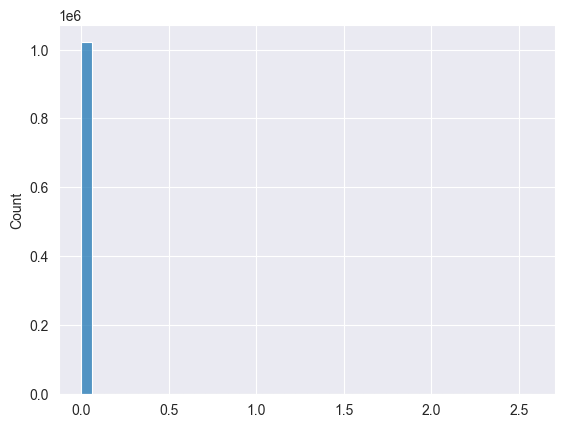

In [25]:
train_velocity = train["haversine"] / train["trip_duration"]
sns.histplot(train_velocity, bins=40)

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

<Axes: ylabel='Count'>

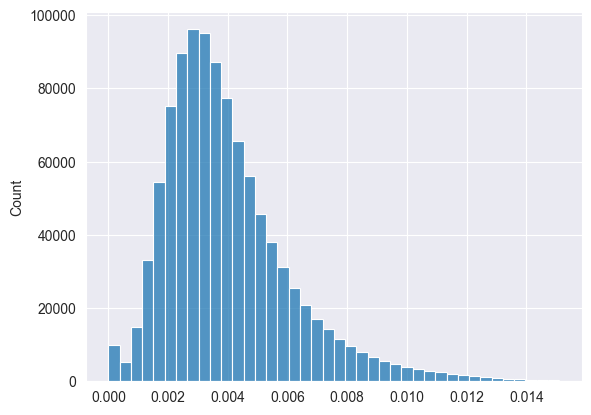

In [26]:
real_velocities = train_velocity[train_velocity * 3600 < np.quantile(train_velocity * 3600, 0.999)]
sns.histplot(real_velocities, bins=40)

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

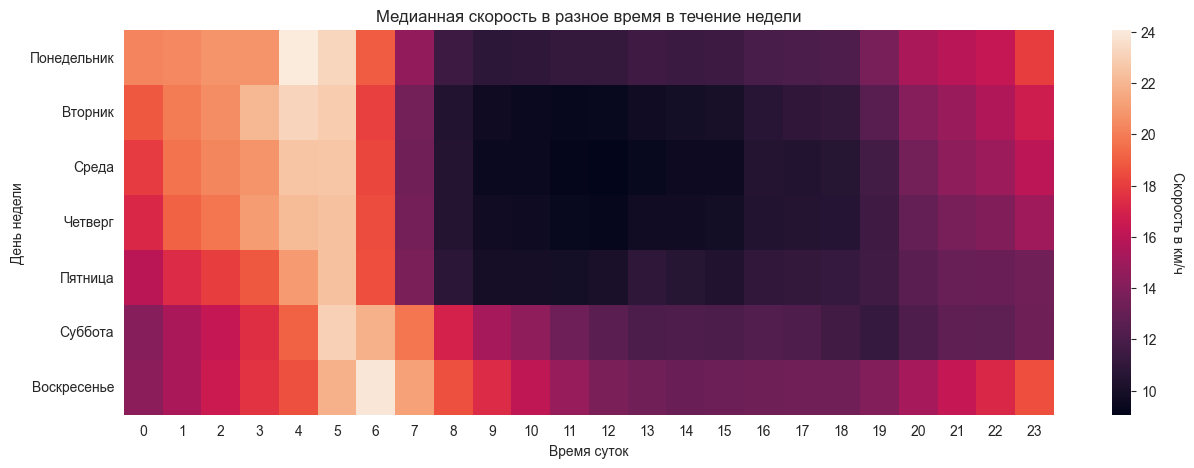

In [27]:
train["velocity"] = (train["haversine"] / train["trip_duration"]) * 3600

heatmap_df = train.groupby(["dow", "hour"]).median("velocity")[["velocity"]]\
                  .reset_index().pivot(index="dow", columns="hour", values="velocity")

plt.figure(figsize=(15, 5))

ax = plt.gca()

sns.heatmap(heatmap_df)

ax.set_title("Медианная скорость в разное время в течение недели")
ax.set_xlabel("Время суток")
ax.set_ylabel("День недели")
ax.set_yticklabels(["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"])
plt.yticks(rotation=0)

ax.collections[0].colorbar.set_label("Скорость в км/ч", rotation=270, labelpad=20)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ:**: Значение скорость рассчитывается на основе длительности поездки, которой мы не будем располагать на новых данных - ведь это таргет

In [28]:
train = train.drop(columns=["velocity"])
train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1247960  id2374035          1 2016-01-30 13:50:34                1   
100182   id0812705          2 2016-01-22 07:23:51                1   
313351   id0128814          1 2016-03-03 00:24:48                1   
1295537  id1188135          1 2016-03-06 19:41:14                1   
393902   id1097874          2 2016-01-01 20:22:33                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1247960        -74.001633        40.737621         -73.993294   
100182         -73.989967        40.756969         -73.979553   
313351         -73.978699        40.745083         -73.904404   
1295537        -73.989822        40.734142         -73.939659   
393902         -74.015541        40.716038         -74.005951   

         dropoff_latitude store_and_fwd_flag  trip_duration  \
1247960         40.742355                  N            298   
100182          40.756580                  N            191   
313351          40.747616                  N            966   
1295537         40.700581                  N           1752   
393902          40.723640                  N            429   

         log_trip_duration  dow  month  hour  anomal_blizz  anomal_mem  \
1247960           5.700444    5      1    13             0           0   
100182            5.257495    4      1     7             0           0   
313351            6.874198    3      3     0             0           0   
1295537           7.469084    6      3    19             0           0   
393902            6.063785    4      1    20             0           0   

         day_number  haversine  log_haversine  
1247960          30   0.877885       0.630146  
100182           22   0.878236       0.630333  
313351           63   6.265098       1.983082  
1295537          66   5.639187       1.892989  
393902            1   1.169564       0.774526

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: скорость максимальна с 4 до 5 утра в будние дни и с 5 до 6 в выходные; минимальна с 9 до 15 в будние.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [29]:
train["jams"] = (train["hour"].between(9, 15) & train["dow"].between(0, 4)).astype(int)
train["free_roads"] = ((train["hour"].between(4, 5) & train["dow"].between(0, 4)) | (train["hour"].between(5, 6) & train["dow"].between(5, 6))).astype(int)

test["jams"] = (test["hour"].between(9, 15) & test["dow"].between(0, 4)).astype(int)
test["free_roads"] = ((test["hour"].between(4, 5) & test["dow"].between(0, 4)) | (test["hour"].between(5, 6) & test["dow"].between(5, 6))).astype(int)

train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1247960  id2374035          1 2016-01-30 13:50:34                1   
100182   id0812705          2 2016-01-22 07:23:51                1   
313351   id0128814          1 2016-03-03 00:24:48                1   
1295537  id1188135          1 2016-03-06 19:41:14                1   
393902   id1097874          2 2016-01-01 20:22:33                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1247960        -74.001633        40.737621         -73.993294   
100182         -73.989967        40.756969         -73.979553   
313351         -73.978699        40.745083         -73.904404   
1295537        -73.989822        40.734142         -73.939659   
393902         -74.015541        40.716038         -74.005951   

         dropoff_latitude store_and_fwd_flag  trip_duration  ...  dow  month  \
1247960         40.742355                  N            298  ...    5      1   
100182          40.756580                  N            191  ...    4      1   
313351          40.747616                  N            966  ...    3      3   
1295537         40.700581                  N           1752  ...    6      3   
393902          40.723640                  N            429  ...    4      1   

         hour  anomal_blizz  anomal_mem  day_number  haversine  log_haversine  \
1247960    13             0           0          30   0.877885       0.630146   
100182      7             0           0          22   0.878236       0.630333   
313351      0             0           0          63   6.265098       1.983082   
1295537    19             0           0          66   5.639187       1.892989   
393902     20             0           0           1   1.169564       0.774526   

         jams  free_roads  
1247960     0           0  
100182      0           0  
313351      0           0  
1295537     0           0  
393902      0           0  

[5 rows x 21 columns]

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [30]:
manh = [
    ((40.70924526333071, -74.00853760589693), 1100),
    ((40.72396127446264, -73.99220874941628), 1750),
    ((40.743742328503394, -73.99094846896804), 1900),
    ((40.76317530832563, -73.98037131502737), 1950),
    ((40.77940076073553, -73.96798254483453), 2050)
]


jfk = ((40.64617111876819, -73.78425585210836), 1000)


laguard = ((40.771355144069915, -73.86737500267739), 1000)

your_lat_values, your_lon_values = random_lat_lon(df)

m = show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

# testing selected areas

for coords, r in manh:
    folium.Circle(location=coords, radius=r).add_to(m)

folium.Circle(location=jfk[0], radius=jfk[1]).add_to(m)

folium.Circle(location=laguard[0], radius=laguard[1]).add_to(m)

m

In [31]:
train["jfk_pickup"] = (haversine_array(train["pickup_latitude"], train["pickup_longitude"], jfk[0][0], jfk[0][1]) < jfk[1] / 1000).astype(int)
train["jfk_dropoff"] = (haversine_array(train["dropoff_latitude"], train["dropoff_longitude"], jfk[0][0], jfk[0][1]) < jfk[1] / 1000).astype(int)

train["laguard_pickup"] = (haversine_array(train["pickup_latitude"], train["pickup_longitude"], laguard[0][0], laguard[0][1]) < laguard[1] / 1000).astype(int)
train["laguard_dropoff"] = (haversine_array(train["dropoff_latitude"], train["dropoff_longitude"], laguard[0][0], laguard[0][1]) < laguard[1] / 1000).astype(int)

train["manh_pickup"] = False
for coords, r in manh:
    train["manh_pickup"] = train["manh_pickup"] | (haversine_array(train["pickup_latitude"], train["pickup_longitude"], coords[0], coords[1]) < r / 1000)
train["manh_pickup"] = train["manh_pickup"].astype(int)

train["manh_dropoff"] = False
for coords, r in manh:
    train["manh_dropoff"] = train["manh_dropoff"] | (haversine_array(train["dropoff_latitude"], train["dropoff_longitude"], coords[0], coords[1]) < r / 1000)
train["manh_dropoff"] = train["manh_dropoff"].astype(int)

train

id  vendor_id     pickup_datetime  passenger_count  \
1247960  id2374035          1 2016-01-30 13:50:34                1   
100182   id0812705          2 2016-01-22 07:23:51                1   
313351   id0128814          1 2016-03-03 00:24:48                1   
1295537  id1188135          1 2016-03-06 19:41:14                1   
393902   id1097874          2 2016-01-01 20:22:33                1   
...            ...        ...                 ...              ...   
1223334  id2882489          2 2016-04-24 09:23:26                3   
1398511  id0042092          2 2016-03-17 17:22:34                1   
395403   id3210184          2 2016-03-08 07:08:26                1   
697756   id2646206          2 2016-02-02 13:37:54                1   
1292334  id1592830          1 2016-04-16 00:16:30                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1247960        -74.001633        40.737621         -73.993294   
100182         -73.989967        40.756969         -73.979553   
313351         -73.978699        40.745083         -73.904404   
1295537        -73.989822        40.734142         -73.939659   
393902         -74.015541        40.716038         -74.005951   
...                   ...              ...                ...   
1223334        -73.975281        40.756969         -73.967102   
1398511        -73.983681        40.757961         -73.998550   
395403         -73.958359        40.778492         -74.011131   
697756         -74.007774        40.740574         -73.995544   
1292334        -73.981003        40.744396         -73.989906   

         dropoff_latitude store_and_fwd_flag  trip_duration  ...  haversine  \
1247960         40.742355                  N            298  ...   0.877885   
100182          40.756580                  N            191  ...   0.878236   
313351          40.747616                  N            966  ...   6.265098   
1295537         40.700581                  N           1752  ...   5.639187   
393902          40.723640                  N            429  ...   1.169564   
...                   ...                ...            ...  ...        ...   
1223334         40.788601                  N            749  ...   3.584054   
1398511         40.764126                  N            840  ...   1.427694   
395403          40.701843                  N           1076  ...   9.612920   
697756          40.733517                  N            770  ...   1.295203   
1292334         40.723152                  N            861  ...   2.478491   

         log_haversine  jams  free_roads  jfk_pickup  jfk_dropoff  \
1247960       0.630146     0           0           0            0   
100182        0.630333     0           0           0            0   
313351        1.983082     0           0           0            0   
1295537       1.892989     0           0           0            0   
393902        0.774526     0           0           0            0   
...                ...   ...         ...         ...          ...   
1223334       1.522584     0           0           0            0   
1398511       0.886942     0           0           0            0   
395403        2.362072     0           0           0            0   
697756        0.830821     1           0           0            0   
1292334       1.246599     0           0           0            0   

         laguard_pickup  laguard_dropoff  manh_pickup  manh_dropoff  
1247960               0                0            1             1  
100182                0                0            1             1  
313351                0                0            1             0  
1295537               0                0            1             0  
393902                0                0            1             1  
...                 ...              ...          ...           ...  
1223334               0                0            1             1  
1398511               0                0            1   

In [32]:
test["jfk_pickup"] = (haversine_array(test["pickup_latitude"], test["pickup_longitude"], jfk[0][0], jfk[0][1]) < jfk[1] / 1000).astype(int)
test["jfk_dropoff"] = (haversine_array(test["dropoff_latitude"], test["dropoff_longitude"], jfk[0][0], jfk[0][1]) < jfk[1] / 1000).astype(int)

test["laguard_pickup"] = (haversine_array(test["pickup_latitude"], test["pickup_longitude"], laguard[0][0], laguard[0][1]) < laguard[1] / 1000).astype(int)
test["laguard_dropoff"] = (haversine_array(test["dropoff_latitude"], test["dropoff_longitude"], laguard[0][0], laguard[0][1]) < laguard[1] / 1000).astype(int)

test["manh_pickup"] = False
for coords, r in manh:
    test["manh_pickup"] = test["manh_pickup"] | (haversine_array(test["pickup_latitude"], test["pickup_longitude"], coords[0], coords[1]) < r / 1000)
test["manh_pickup"] = test["manh_pickup"].astype(int)

test["manh_dropoff"] = False
for coords, r in manh:
    test["manh_dropoff"] = test["manh_dropoff"] | (haversine_array(test["dropoff_latitude"], test["dropoff_longitude"], coords[0], coords[1]) < r / 1000)
test["manh_dropoff"] = test["manh_dropoff"].astype(int)

test

id  vendor_id     pickup_datetime  passenger_count  \
87524    id1469172          2 2016-03-17 22:22:12                1   
344606   id0847428          2 2016-05-05 20:58:25                2   
991125   id3989309          1 2016-06-21 19:32:58                1   
773231   id0979487          2 2016-05-20 08:03:01                2   
659540   id3057513          1 2016-02-16 08:37:08                1   
...            ...        ...                 ...              ...   
300070   id1607114          1 2016-01-08 12:31:27                1   
1278492  id2834326          1 2016-06-10 09:59:15                1   
1024269  id2100862          1 2016-02-16 15:25:15                1   
939261   id2932332          2 2016-03-06 12:39:07                1   
476137   id1779796          2 2016-02-29 10:22:08                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
87524          -73.965210        40.754959         -73.949150   
344606         -73.991287        40.744896         -73.959465   
991125         -73.994171        40.751160         -73.971992   
773231         -74.002441        40.750214         -74.009682   
659540         -73.957893        40.778900         -73.971725   
...                   ...              ...                ...   
300070         -73.997841        40.724308         -73.996536   
1278492        -74.014252        40.704498         -73.985168   
1024269        -73.966454        40.762249         -73.968636   
939261         -73.976532        40.760197         -73.997398   
476137         -73.949722        40.772129         -74.008034   

         dropoff_latitude store_and_fwd_flag  trip_duration  ...  haversine  \
87524           40.777729                  N            520  ...   2.870505   
344606          40.801308                  N           1300  ...   6.821106   
991125          40.754059                  N            635  ...   1.895808   
773231          40.722153                  N            621  ...   3.179305   
659540          40.759972                  N            607  ...   2.405587   
...                   ...                ...            ...  ...        ...   
300070          40.722122                  N            200  ...   0.266762   
1278492         40.695976                  N           1138  ...   2.628486   
1024269         40.770393                  N            287  ...   0.924069   
939261          40.726238                  N            834  ...   4.165149   
476137          40.711819                  N           1024  ...   8.313051   

         log_haversine  jams  free_roads  jfk_pickup  jfk_dropoff  \
87524         1.353385     0           0           0            0   
344606        2.056826     0           0           0            0   
991125        1.063264     0           0           0            0   
773231        1.430145     0           0           0            0   
659540        1.225417     0           0           0            0   
...                ...   ...         ...         ...          ...   
300070        0.236464     1           0           0            0   
1278492       1.288815     1           0           0            0   
1024269       0.654442     1           0           0            0   
939261        1.641934     0           0           0            0   
476137        2.231417     1           0           0            0   

         laguard_pickup  laguard_dropoff  manh_pickup  manh_dropoff  
87524                 0                0            1             1  
344606                0                0            1             0  
991125                0                0            1             1  
773231                0                0            1             1  
659540                0                0            1             1  
...                 ...              ...          ...           ...  
300070                0                0            1             1  
1278492               0                0            1   

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

<Axes: xlabel='jfk_dropoff', ylabel='log_trip_duration'>

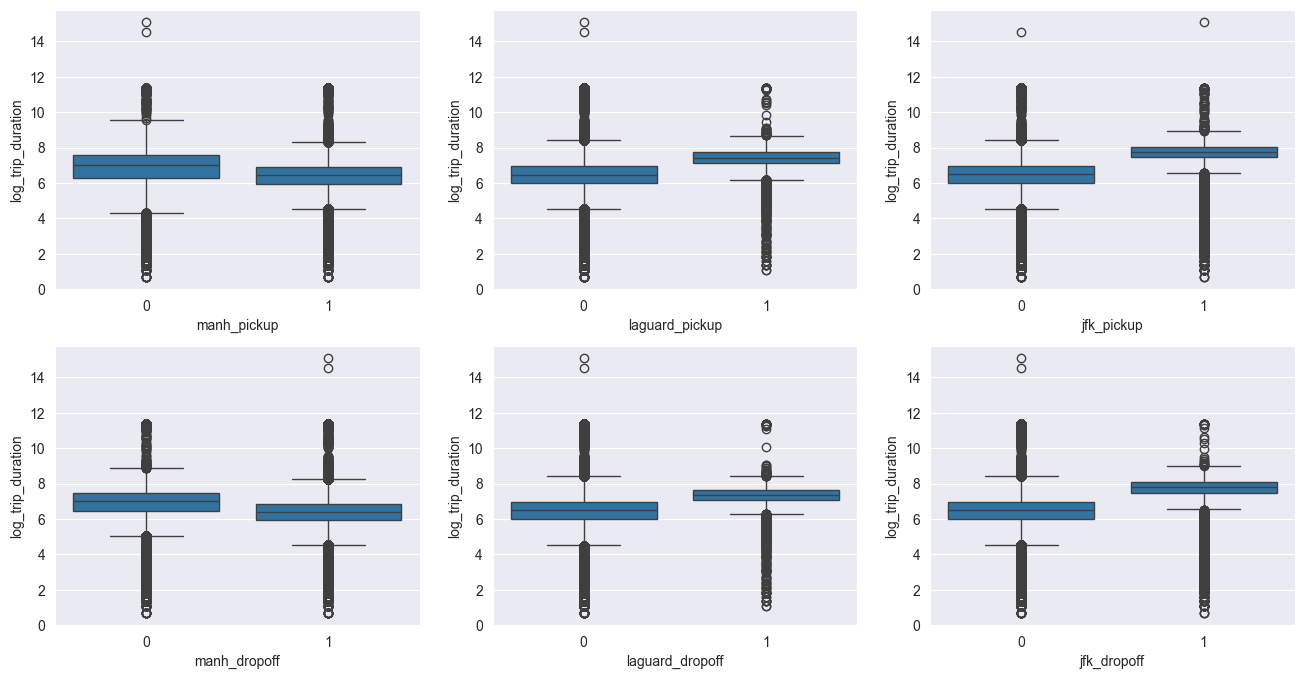

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

sns.boxplot(data=train, x="manh_pickup", y="log_trip_duration", ax=axes[0, 0])
sns.boxplot(data=train, x="manh_dropoff", y="log_trip_duration", ax=axes[1, 0])

sns.boxplot(data=train, x="laguard_pickup", y="log_trip_duration", ax=axes[0, 1])
sns.boxplot(data=train, x="laguard_dropoff", y="log_trip_duration", ax=axes[1, 1])

sns.boxplot(data=train, x="jfk_pickup", y="log_trip_duration", ax=axes[0, 2])
sns.boxplot(data=train, x="jfk_dropoff", y="log_trip_duration", ax=axes[1, 2])

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки? \
**Ответ**: для всех признаков мы видим, что среднее время поездки в ту или иную сторону отличается при наличии признака в сравнении с его отсутствием. Явнее всего это заметно для аэропортов, особенно для JFK - что неудивительно, этот аэропорт находится на окраине. Значит, наличие каждого из этих прзнаков говорит нам что-то об ожидаемой длительности поездки, чего мы и пытались добиться.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.borders = [(40.705204462668355, -73.94020361867777), # SE
                        (40.79840265448927, -73.93916435523964), # NE
                        (40.79824129576259, -74.0184594024428), # NW
                        (40.70455642830639, -74.01938079504515)] # SW
        
        self.n_rows = 10
        self.n_cols = 10

        self.grid_lon = np.linspace(self.borders[3][1], self.borders[0][1], self.n_cols + 1)
        self.grid_lat = np.linspace(self.borders[3][0], self.borders[2][0], self.n_rows + 1)
        self.grid = np.meshgrid(self.grid_lon, self.grid_lat, indexing='xy')
        
    def show_map(self):
        m = folium.Map(location=(40.75862429418134, -73.97684371278865))

        for lon, lat in np.stack((self.grid[0].flatten(), self.grid[1].flatten()), axis=1):
            folium.Circle((lat, lon), color='blue').add_to(m)

        return m

    def fit(self, X=None, y=None):
        # your code here
        return self

    def transform(self, X, y=None):
        pickup_cell_long = np.searchsorted(self.grid_lon, X['pickup_longitude'])
        pickup_cell_lat = np.searchsorted(self.grid_lat, X['pickup_latitude'])
        pickup_cell = np.where(
            (pickup_cell_long >= 1) & (pickup_cell_long <= self.n_cols) & (pickup_cell_lat >= 1) & (pickup_cell_lat <= self.n_rows),
            pickup_cell_long + pickup_cell_lat*self.n_cols,
            -1
        )

        dropoff_cell_long = np.searchsorted(self.grid_lon, X['dropoff_longitude'])
        dropoff_cell_lat = np.searchsorted(self.grid_lat, X['dropoff_latitude'])
        dropoff_cell = np.where(
            (dropoff_cell_long >= 1) & (dropoff_cell_long <= self.n_cols) & (dropoff_cell_lat >= 1) & (dropoff_cell_lat <= self.n_rows),
            dropoff_cell_long + dropoff_cell_lat*self.n_cols,
            -1
        )
        
        return X.assign(pickup_cell=pickup_cell, dropoff_cell=dropoff_cell).drop(columns=["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"])

In [35]:
MapGridTransformer().show_map()

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [36]:
X_train = train.drop(columns=["log_trip_duration", "trip_duration", "id", "pickup_datetime", "vendor_id", "store_and_fwd_flag"])
Y_train = train[["log_trip_duration"]]
X_test = test.drop(columns=["log_trip_duration", "trip_duration", "id", "pickup_datetime", "vendor_id", "store_and_fwd_flag"])
Y_test = test[["log_trip_duration"]]

categorical = ["dow", "month", "hour", "pickup_cell", "dropoff_cell"]
numeric = ["day_number", "log_haversine"]

column_tranformer = ColumnTransformer(
    transformers=[
        ("scaling", StandardScaler(), numeric),
        ("ohe", OneHotEncoder(handle_unknown="ignore"), categorical),
    ],
    remainder="passthrough"
)

pipeline = Pipeline(steps=[
    ("create_grid", MapGridTransformer()),
    ("preprocess", column_tranformer),
    ("regression", Ridge())
])

model = pipeline.fit(X_train, Y_train)
test_prediction = model.predict(X_test)
print(rmsle(Y_test, test_prediction))

log_trip_duration    0.466798
dtype: float64


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: 
1. `vendor_id`. Возможно, разные поставщики услуг такси больше или меньше работают в разных районах, используют разные автомобили и т.д. - всё это может повлиять на ожидаемое время поездки
2. `passenger_count`. Поездки с разным количеством паассажиров (особенно если речь идёт о большом числе, например, больще 3-4) могут отличаться по смыслу. Поездка с одним пассажиром более вероятно является деловой поездкой в центре города, чем поездка с 5 пассажирами. А разные по смыслу поезки, вероятно, в среднем имеют разную продолжительность.
3. `store_and_fwd_flag`. Если транспортное средство не имело подключения к серверу в момент завершения поездки, оно могло находиться в каком-то специфическом месте, где нет связи, или могла быть совершена в какой-то специфический период времени, когда сервер не работал. Эти обстотельства тоже могут косвенно содержать информацию о продолжительности поездки.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [37]:
print(df["vendor_id"].value_counts(), df["passenger_count"].value_counts(), df["store_and_fwd_flag"].value_counts())

vendor_id
2    780302
1    678342
Name: count, dtype: int64 passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64 store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

Text(0.5, 0.98, 'Ящики с усами для трёх признаков')

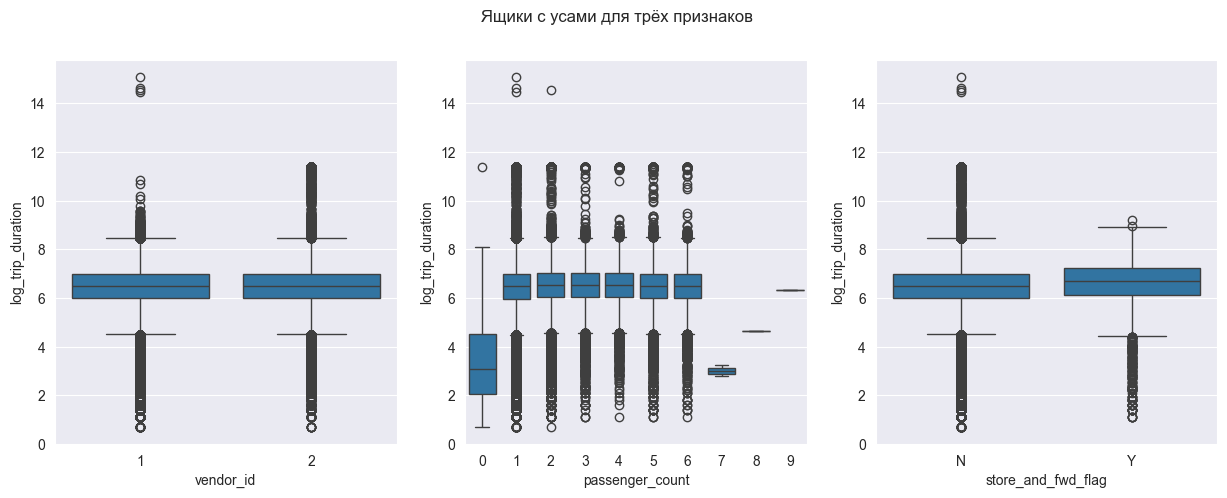

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=df, x="vendor_id", y="log_trip_duration", ax=axes[0])

sns.boxplot(data=df, x="passenger_count", y="log_trip_duration", ax=axes[1])

sns.boxplot(data=df, x="store_and_fwd_flag", y="log_trip_duration", ax=axes[2])

plt.suptitle("Ящики с усами для трёх признаков")

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [39]:
train["store_and_fwd_flag"] = np.where(train["store_and_fwd_flag"] == "Y", 1, 0)
train["vendor_id"] = train["vendor_id"] - 1

test["store_and_fwd_flag"] = np.where(test["store_and_fwd_flag"] == "Y", 1, 0)
test["vendor_id"] = test["vendor_id"] - 1

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: `vendor_id` вряд ли будет полезен - средние значения практически совпадают в обеих группах. `store_and_fwd_flag` показывает немного большую разницу в средних, но всё ещё вряд ли будет силььным признаком. `passenger_count` будет иметь сильное влияние на результат при специфических значениях, но наблюдений с такими значениями в выборке буквально единицы (либо они не имеют смысла - 0 пассажиров); среди реалистичных значений числа пассажиров средние, как кажется, отличаются слабо.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [40]:
X_train = train.drop(columns=["log_trip_duration", "trip_duration", "id", "pickup_datetime", "vendor_id", "store_and_fwd_flag", "haversine"])
Y_train = train[["log_trip_duration"]]
X_test = test.drop(columns=["log_trip_duration", "trip_duration", "id", "pickup_datetime", "vendor_id", "store_and_fwd_flag", "haversine"])
Y_test = test[["log_trip_duration"]]

categorical = ["dow", "month", "hour", "pickup_cell", "dropoff_cell", "passenger_count"]
numeric = ["day_number", "log_haversine"]

column_tranformer = ColumnTransformer(
    transformers=[
        ("scaling", StandardScaler(), numeric),
        ("ohe", OneHotEncoder(handle_unknown="ignore"), categorical),
    ],
    remainder="passthrough"
)

pipeline = Pipeline(steps=[
    ("create_grid", MapGridTransformer()),
    ("preprocess", column_tranformer),
    ("regression", Ridge())
])

model = pipeline.fit(X_train, Y_train)
test_prediction = model.predict(X_test)
print(rmsle(Y_test, test_prediction))

log_trip_duration    0.470653
dtype: float64


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

**Комментарий**: ошибка снизилась примерно на одну тысячную, поэтому целесообразно выбросить признаки.

In [41]:
train = train.drop(columns=["store_and_fwd_flag", "vendor_id", "passenger_count"])
test = test.drop(columns=["store_and_fwd_flag", "vendor_id", "passenger_count"])

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [42]:
X_train = train.drop(columns=["log_trip_duration", "trip_duration", "id", "pickup_datetime", "haversine"])
Y_train = train[["log_trip_duration"]]

categorical = ["dow", "month", "hour", "pickup_cell", "dropoff_cell"]
numeric = ["day_number", "log_haversine"]

column_tranformer = ColumnTransformer(
    transformers=[
        ("scaling", StandardScaler(), numeric),
        ("ohe", OneHotEncoder(handle_unknown="ignore"), categorical),
    ],
    remainder="passthrough"
)

pipeline = Pipeline(steps=[
    ("create_grid", MapGridTransformer()),
    ("preprocess", column_tranformer),
    ("regression", Ridge())
])

model = pipeline.fit(X_train, Y_train)
residuals = model.predict(X_train) - Y_train

<Axes: ylabel='Count'>

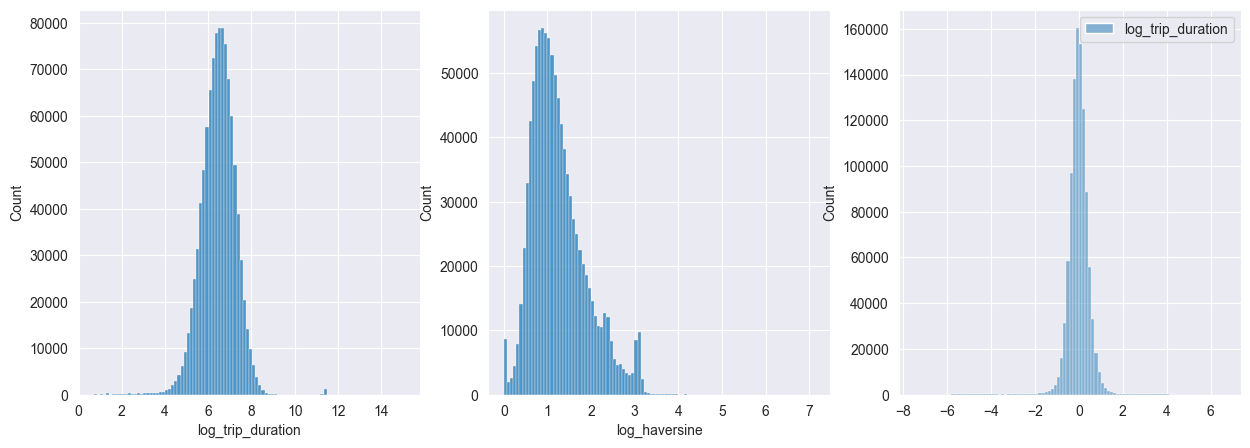

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=train, x="log_trip_duration", bins=100, ax=axes[0])

sns.histplot(data=train, x="log_haversine", bins=100, ax=axes[1])

sns.histplot(data=residuals, bins=100, ax=axes[2])

In [44]:
print(np.quantile(a=train["log_trip_duration"], q=0.9985))
print(np.quantile(a=train["log_trip_duration"], q=0.005), end='\n\n')

print(np.quantile(a=train["haversine"], q=0.9999))
print(np.quantile(a=train["haversine"], q=0.05), end='\n\n')

print(np.quantile(a=residuals, q=0.001))
print(np.quantile(a=residuals, q=0.999))

8.904901577935142
3.9318256327243257

43.42251964889821
0.5950745137242609

-4.38625950828193
2.8217131463965623


In [45]:
train["residuals"] = residuals

train = train[
    (train["log_trip_duration"] <= np.quantile(train["log_trip_duration"], 0.9985)) &
    (train["log_trip_duration"] >= np.quantile(train["log_trip_duration"], 0.005)) &
    (train["haversine"] <= np.quantile(train["haversine"], 0.9999)) &
    (train["haversine"] >= np.quantile(train["haversine"], 0.05)) &
    (train["residuals"] <= np.quantile(train["residuals"], 0.999)) &
    (train["residuals"] >= np.quantile(train["residuals"], 0.001))
]

train = train.drop(columns=["residuals"])
train

id     pickup_datetime  pickup_longitude  pickup_latitude  \
1247960  id2374035 2016-01-30 13:50:34        -74.001633        40.737621   
100182   id0812705 2016-01-22 07:23:51        -73.989967        40.756969   
313351   id0128814 2016-03-03 00:24:48        -73.978699        40.745083   
1295537  id1188135 2016-03-06 19:41:14        -73.989822        40.734142   
393902   id1097874 2016-01-01 20:22:33        -74.015541        40.716038   
...            ...                 ...               ...              ...   
1223334  id2882489 2016-04-24 09:23:26        -73.975281        40.756969   
1398511  id0042092 2016-03-17 17:22:34        -73.983681        40.757961   
395403   id3210184 2016-03-08 07:08:26        -73.958359        40.778492   
697756   id2646206 2016-02-02 13:37:54        -74.007774        40.740574   
1292334  id1592830 2016-04-16 00:16:30        -73.981003        40.744396   

         dropoff_longitude  dropoff_latitude  trip_duration  \
1247960         -73.993294         40.742355            298   
100182          -73.979553         40.756580            191   
313351          -73.904404         40.747616            966   
1295537         -73.939659         40.700581           1752   
393902          -74.005951         40.723640            429   
...                    ...               ...            ...   
1223334         -73.967102         40.788601            749   
1398511         -73.998550         40.764126            840   
395403          -74.011131         40.701843           1076   
697756          -73.995544         40.733517            770   
1292334         -73.989906         40.723152            861   

         log_trip_duration  dow  month  ...  haversine  log_haversine  jams  \
1247960           5.700444    5      1  ...   0.877885       0.630146     0   
100182            5.257495    4      1  ...   0.878236       0.630333     0   
313351            6.874198    3      3  ...   6.265098       1.983082     0   
1295537           7.469084    6      3  ...   5.639187       1.892989     0   
393902            6.063785    4      1  ...   1.169564       0.774526     0   
...                    ...  ...    ...  ...        ...            ...   ...   
1223334           6.620073    6      4  ...   3.584054       1.522584     0   
1398511           6.734592    3      3  ...   1.427694       0.886942     0   
395403            6.981935    1      3  ...   9.612920       2.362072     0   
697756            6.647688    1      2  ...   1.295203       0.830821     1   
1292334           6.759255    5      4  ...   2.478491       1.246599     0   

         free_roads  jfk_pickup  jfk_dropoff  laguard_pickup  laguard_dropoff  \
1247960           0           0            0               0                0   
100182            0           0            0               0                0   
313351            0           0            0               0                0   
1295537           0           0            0               0                0   
393902            0           0            0               0                0   
...             ...         ...          ...             ...              ...   
1223334           0           0            0               0                0   
1398511           0           0            0               0                0   
395403            0           0            0               0                0   
697756            0           0            0               0                0   
1292334           0           0            0               0                0   

         manh_pickup  manh_dropoff  
1247960            1             1  
100182             1             1  
313351             1             0  
1295537            1             0  
393902             1             1  
...              ...           ...  
1223334            1             1  
1398511            1             1  
395403             1             1  
697756             1             1  
12923

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

**Комментарий**: По всем категориальным признакам кроме тех, что связаны с клеткой начала и конца поездки, а именно month, dow и hour, редкие категории отстутствуют. Для клеток же очевидно обратное - есть клетки, из которых или в которые поездки почти не совершались (как минимум потому, что часть клеток покрывают почти только воду). Но признаки под клетки создаются в трансформере, поэтому и отсеивать пустые клетки имеет смысл там. Напишем новый трансформер, который в методе `transform` будет производить отсев клеток.

In [46]:
class ReducedMapGridTransformer(MapGridTransformer):
    def __init__(self):
        super().__init__()

    def transform(self, X, y=None):
        pickup_cell_long = np.searchsorted(self.grid_lon, X['pickup_longitude'])
        pickup_cell_lat = np.searchsorted(self.grid_lat, X['pickup_latitude'])
        pickup_cell = np.where(
            (pickup_cell_long >= 1) & (pickup_cell_long <= self.n_cols) & (pickup_cell_lat >= 1) & (pickup_cell_lat <= self.n_rows),
            pickup_cell_long + pickup_cell_lat*self.n_cols,
            -1
        )

        dropoff_cell_long = np.searchsorted(self.grid_lon, X['dropoff_longitude'])
        dropoff_cell_lat = np.searchsorted(self.grid_lat, X['dropoff_latitude'])
        dropoff_cell = np.where(
            (dropoff_cell_long >= 1) & (dropoff_cell_long <= self.n_cols) & (dropoff_cell_lat >= 1) & (dropoff_cell_lat <= self.n_rows),
            dropoff_cell_long + dropoff_cell_lat*self.n_cols,
            -1
        )

        pickup_values, pickup_counts = np.unique(pickup_cell, return_counts=True)
        rare_pickup_values = pickup_values[pickup_counts < 50]
        pickup_cell[np.isin(pickup_cell, rare_pickup_values)] = -2
        
        dropoff_values, dropoff_counts = np.unique(dropoff_cell, return_counts=True)
        rare_dropoff_values = dropoff_values[dropoff_counts < 50]
        dropoff_cell[np.isin(dropoff_cell, rare_dropoff_values)] = -2
        
        return X.assign(pickup_cell=pickup_cell, dropoff_cell=dropoff_cell).drop(columns=["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"])

In [47]:
rmgt = ReducedMapGridTransformer()

print(rmgt.transform(train)['pickup_cell'].value_counts()[-2])
print(rmgt.transform(train)['dropoff_cell'].value_counts()[-2])

221
102


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [48]:
X_train = train.drop(columns=["log_trip_duration", "trip_duration", "id", "pickup_datetime"])
Y_train = train[["log_trip_duration"]]
X_test = test.drop(columns=["log_trip_duration", "trip_duration", "id", "pickup_datetime"])
Y_test = test[["log_trip_duration"]]

pipeline = Pipeline(steps=[
    ("create_grid", ReducedMapGridTransformer()),
    ("preprocess", column_tranformer),
    ("regression", Ridge())
])

model_ridge = pipeline.fit(X_train, Y_train)
test_prediction = model_ridge.predict(X_test)
print(rmsle(Y_test, test_prediction))

log_trip_duration    0.4696
dtype: float64


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [49]:
print("До кодирования:", len(X_test.columns) - 4)
print("После кодирования:", len(model[1].get_feature_names_out()))

До кодирования: 16
После кодирования: 211


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [50]:
from sklearn.linear_model import Lasso

X_train = train.drop(columns=["log_trip_duration", "trip_duration", "id", "pickup_datetime"])
Y_train = train[["log_trip_duration"]]
X_test = test.drop(columns=["log_trip_duration", "trip_duration", "id", "pickup_datetime"])
Y_test = test[["log_trip_duration"]]

pipeline_lasso = Pipeline(steps=[
    ("create_grid", ReducedMapGridTransformer()),
    ("preprocess", column_tranformer),
    ("regression", Lasso())
])

model_lasso = pipeline_lasso.fit(X_train, Y_train)
test_prediction = model_lasso.predict(X_test)
print(rmsle(Y_test['log_trip_duration'], test_prediction))

0.6898560028119115


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [51]:
from sklearn.model_selection import cross_val_score

cv_df = train.drop(columns=["trip_duration", "id", "pickup_datetime", "haversine"])

X_train_cv, X_val_cv, Y_train_cv, Y_val_cv = train_test_split(cv_df.drop(columns=["log_trip_duration"]), cv_df[["log_trip_duration"]], test_size=0.2)

In [52]:
ridge_errors = []

alphas = np.logspace(-3, 3, 40)

for alpha in alphas:
    pipeline = Pipeline(steps=[
        ("create_grid", ReducedMapGridTransformer()),
        ("preprocess", column_tranformer),
        ("regression", Ridge(alpha=alpha))
    ])

    model = pipeline.fit(X_val_cv, Y_val_cv)
    pred = model.predict(X_test)

    ridge_errors.append((alpha, rmsle(Y_test, pred)))

In [53]:
lasso_errors = []
zeros = []

alphas = np.logspace(-3, 3, 40)

for alpha in alphas:
    pipeline = Pipeline(steps=[
        ("create_grid", ReducedMapGridTransformer()),
        ("preprocess", column_tranformer),
        ("regression", Lasso(alpha=alpha))
    ])

    model = pipeline.fit(X_val_cv, Y_val_cv)
    pred = model.predict(X_test)

    lasso_errors.append((alpha, rmsle(Y_test["log_trip_duration"], pred)))
    zeros.append((alpha, np.count_nonzero(model[-1].coef_ == 0)))

In [55]:
print(min(ridge_errors, key=lambda el: el[1]["log_trip_duration"]))
print(min(lasso_errors, key=lambda el: el[1]))

(np.float64(0.28942661247167517), log_trip_duration    0.472219
dtype: float64)
(np.float64(0.001), np.float64(0.48001875024534657))


Сохраните наилучшее значение, как бенчмарк на будущее

In [56]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
best_rmsle = min(ridge_errors, key=lambda el: el[1]["log_trip_duration"])[1]
best_rmsle

log_trip_duration    0.472219
dtype: float64

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

**Ответ**: Чтобы избавиться хотя бы от половины признаков, считая признаки, появившиеся в ходе OHE для каждой из клеток, достаточно взять маленькую альфу, при которой качество будет не так плохо (хотя всё ещё хуже, чем у Ridge).

Text(0.5, 1.0, 'Количество нулевых признаков и RMSLE для Lasso в зависимости от гиперпараметра')

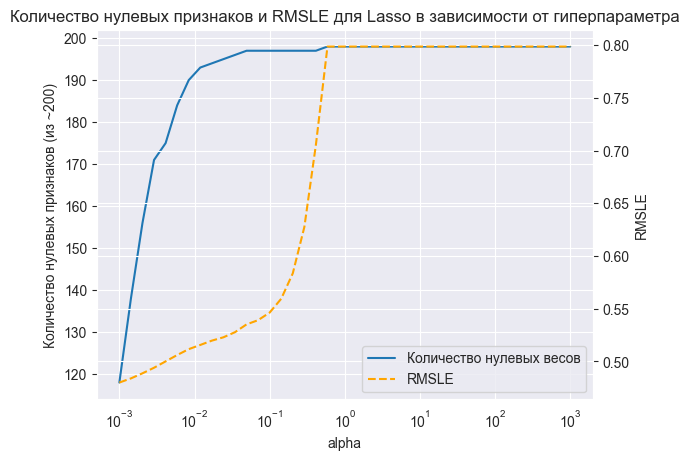

In [57]:
plt.xscale("log")
plt.xlabel("alpha")

sns.lineplot(x=np.asarray(zeros)[:, 0], y=np.asarray(zeros)[:, 1], label="Количество нулевых весов")
lines, labels = plt.gca().get_legend_handles_labels()
plt.gca().get_legend().remove()
plt.gca().set_ylabel("Количество нулевых признаков (из ~200)")

ax2 = plt.twinx()
sns.lineplot(x=np.asarray(lasso_errors)[:, 0], y=np.asarray(lasso_errors)[:, 1], ax=ax2, linestyle="dashed", color="orange", label="RMSLE")
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.set_ylabel("RMSLE")

plt.legend(lines + lines2, labels + labels2, loc="lower right")
plt.title("Количество нулевых признаков и RMSLE для Lasso в зависимости от гиперпараметра")

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответ**: По умолчанию модель предполагает фиксированный эффект для каждой клетки, где начинается поездка, и каждой клетки, где поездка заканчивается. Хотя средняя длительность поездки из клетки A в конкретную клетку B может отличаться от средней длительности поездки из A как таковой. Переменная взаимодействия позволяет это схватить.

**Комментарий**: Так как информация о клетках существует только в пайплайне, а не на стадии датасета с обучающей выборкой, будем проводить все действия в трансформере. Таким образом, от того, на каких данных мы будем фитить модель, может отличаться набор категорий, который в итоге получается (хотя на практике это вряд ли произойдёт из-за больших размеров выборки)

In [58]:
class AdvancedGridMapTransformer(ReducedMapGridTransformer):
    def __init__(self):
        super().__init__()

    def transform(self, X, y=None):
        transformed = super().transform(X)
        cell_frequency = transformed.groupby(["pickup_cell", "dropoff_cell"]).size().reset_index().sort_values(by=0, ascending=False)
        cell_frequency = cell_frequency[(~cell_frequency["pickup_cell"].isin([-1, -2])) & (~cell_frequency["dropoff_cell"].isin([-1, -2]))]
        top_100_pairs = cell_frequency.head(100)[["pickup_cell", "dropoff_cell"]].to_numpy()
        top_100_pairs = top_100_pairs[:, 0].astype(str) + "_" + top_100_pairs[:, 1].astype(str)

        cell_pairs = np.stack([transformed["pickup_cell"], transformed["dropoff_cell"]], axis=1)
        cell_pairs = cell_pairs[:, 0].astype(str) + "_" + cell_pairs[:, 1].astype(str)
                
        is_in_top_100 = np.isin(cell_pairs, top_100_pairs)

        transformed["cell_interaction"] = cell_pairs
        transformed["cell_interaction"] = np.where(is_in_top_100, transformed["cell_interaction"], -1).astype(str)
        
        return transformed

#AdvancedGridMapTransformer().transform(X_train).dtypes

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [59]:
best_ridge_alpha = min(ridge_errors, key=lambda el: el[1]["log_trip_duration"])[0]

X_train = train.drop(columns=["log_trip_duration", "trip_duration", "id", "pickup_datetime", "haversine"])

categorical = ["dow", "month", "hour", "pickup_cell", "dropoff_cell", "cell_interaction"]

column_tranformer = ColumnTransformer(
    transformers=[
        ("scaling", StandardScaler(), numeric),
        ("ohe", OneHotEncoder(handle_unknown="ignore"), categorical),
    ],
    remainder="passthrough"
)

pipeline = Pipeline(steps=[
    ("create_grid", AdvancedGridMapTransformer()),
    ("preprocess", column_tranformer),
    ("regression", Ridge(best_ridge_alpha))
])

model_ridge_interaction = pipeline.fit(X_train, Y_train)
test_prediction = model_ridge_interaction.predict(X_test)
print(rmsle(Y_test, test_prediction))

log_trip_duration    0.468004
dtype: float64


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.